In [1]:
import os
import pandas as pd

In [2]:
os.listdir()

['Fish.csv', '.ipynb_checkpoints', 'Untitled.ipynb']

In [3]:
df = pd.read_csv('./Fish.csv')
df.shape

(159, 7)

In [4]:
import matplotlib.pyplot as plt

In [19]:
smelt = df[df['Species'] == 'Smelt'][['Length2', 'Weight']].values
bream = df[df['Species'] == 'Bream'][['Length1', 'Weight']].values
bream.size, smelt.size

(70, 28)

In [22]:
import numpy as np

In [26]:
fish_data = np.vstack((bream, smelt))
fish_data.size

98

In [52]:
fish_target = np.hstack((np.ones(bream.shape[0]), np.zeros(smelt.shape[0])))
fish_target.size

49

In [53]:
import sklearn

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
kn = KNeighborsClassifier()

In [64]:
fish_data.size, fish_target.size

(98, 49)

In [65]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier(p=1)

In [66]:
kn.score(fish_data, fish_target)

1.0

In [67]:
kn.predict([[30, 600]])

array([1.])

In [72]:
for n in range(5, 50):
    kn.n_neighbors = n
    
    score = kn.score(fish_data, fish_target)
    if score < 1:
        print(n, score)

20 0.9795918367346939
21 0.9795918367346939
22 0.9795918367346939
23 0.9795918367346939
24 0.9795918367346939
25 0.9795918367346939
26 0.9795918367346939
27 0.9795918367346939
28 0.9795918367346939
29 0.7142857142857143
30 0.7142857142857143
31 0.7142857142857143
32 0.7142857142857143
33 0.7142857142857143
34 0.7142857142857143
35 0.7142857142857143
36 0.7142857142857143
37 0.7142857142857143
38 0.7142857142857143
39 0.7142857142857143
40 0.7142857142857143
41 0.7142857142857143
42 0.7142857142857143
43 0.7142857142857143
44 0.7142857142857143
45 0.7142857142857143
46 0.7142857142857143
47 0.7142857142857143
48 0.7142857142857143
49 0.7142857142857143


In [69]:
kn49 = KNeighborsClassifier(n_neighbors=49, p=1)

In [70]:
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49, p=1)

In [71]:
kn49.score(fish_data, fish_target)

0.7142857142857143

In [73]:
'=' * 30, 'CH 02', '=' * 30

('==============================', 'CH 02', '==============================')

In [80]:
fish_data.shape, len(fish_target)

((49, 2), 49)

In [85]:
train_input = fish_data[:35]
train_target = fish_target[:35]
train_input.shape, len(train_target)

((35, 2), 35)

In [86]:
test_input = fish_data[35:]
test_target = fish_target[35:]
test_input.shape, len(test_target)

((14, 2), 14)

In [91]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)
# 샘플링 편향 Sampling bias

0.0

In [93]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [94]:
train_input = fish_data[index[:35]]
train_target = fish_target[index[:35]]
test_input = fish_data[index[35:]]
test_target = fish_target[index[35:]]

test_input.shape, len(test_target)
train_input.shape, len(train_target)

((35, 2), 35)

In [95]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [98]:
pred = kn.predict(test_input)
pred

array([0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

In [97]:
test_target

array([0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

In [99]:
np.allclose(pred, test_target)

True

In [102]:
fish_target = np.concatenate((np.ones(bream.shape[0]), np.zeros(smelt.shape[0])))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
from sklearn.model_selection import train_test_split

In [107]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42, stratify = fish_target)
# stratify = fish_target : 매게변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔

In [108]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((36, 2), (13, 2), (36,), (13,))

In [109]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [110]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [111]:
kn.score(test_input, test_target)

1.0

In [112]:
kn.predict([[25, 150]]) # -> 결과는 빙어 ?

array([0.])

Text(0, 0.5, 'weight')

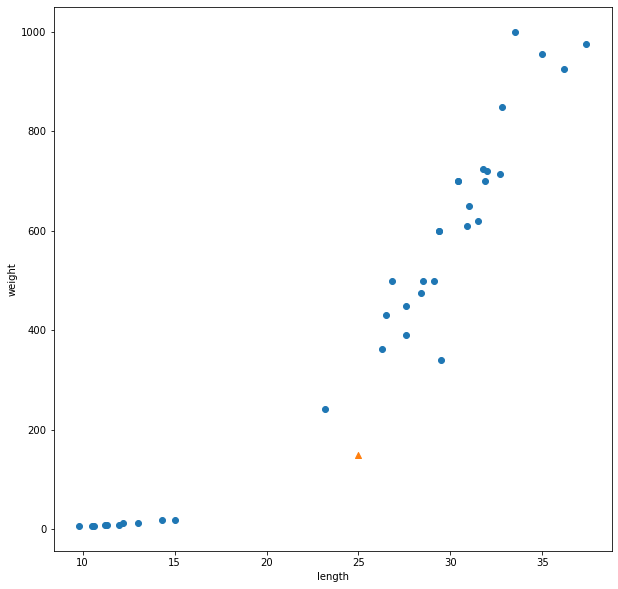

In [114]:
plt.figure(figsize=(10, 10))

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^') # 데이터는 bream 에 더 가까움
plt.xlabel('length')
plt.ylabel('weight')

In [115]:
dist, idx = kn.kneighbors([[25, 150]])

Text(0, 0.5, 'weight')

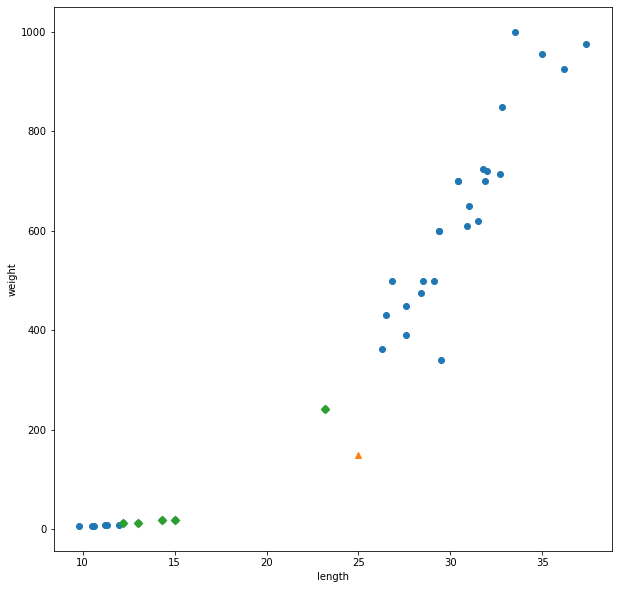

In [124]:
plt.figure(figsize=(10, 10))

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

In [125]:
train_input[idx]

array([[[ 23.2, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [126]:
train_target[idx] # > 가장 가까운 것 : smelt 4, bream 1

array([[1., 0., 0., 0., 0.]])

In [127]:
dist

array([[ 92.01760701, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

(0.0, 1000.0)

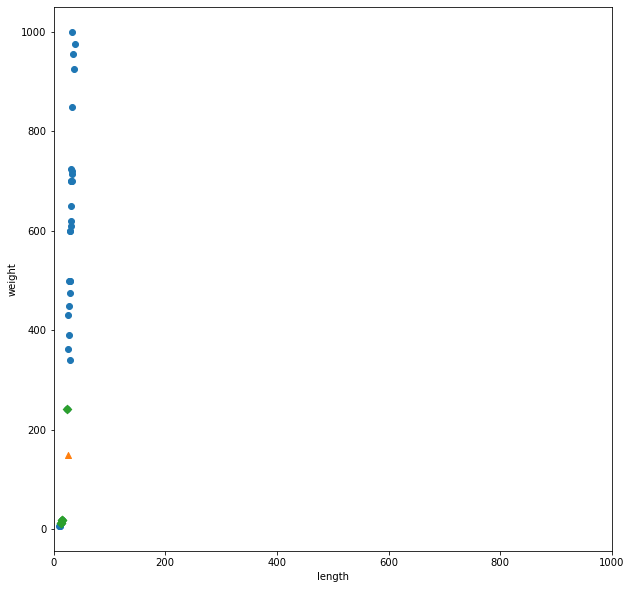

In [128]:
plt.figure(figsize=(10, 10))

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))

In [130]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
mean, std

(array([ 25.26944444, 454.09722222]), array([  8.69999424, 323.29893931]))

In [135]:
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

In [134]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [136]:
kn.score(test_scaled, test_target)

1.0

In [137]:
kn.predict([[25, 150]])

array([1.])

In [141]:
new_data = ([25, 150] - mean) / std
new_data

array([-0.03097065, -0.94060693])

Text(0, 0.5, 'weight')

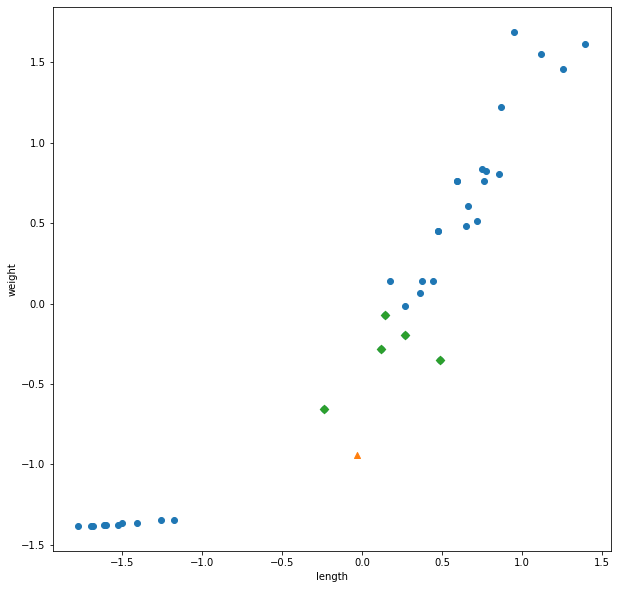

In [143]:
dist, idx = kn.kneighbors([new_data])
plt.figure(figsize=(10, 10))

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_data[0], new_data[1], marker='^')
plt.scatter(train_scaled[idx, 0], train_scaled[idx, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')